In [2]:
#importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# método para particionar dados
from sklearn.model_selection import train_test_split

#método de avaliação de modelo (erro)
from sklearn.metrics import mean_absolute_error

#importando técnicas
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

In [3]:
#Carregando os dados do CSV em um Dataframe Pandas e exibindo primeiros registros
df = pd.read_csv('winequality-white.csv',sep = ';', encoding = "ISO-8859-1")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#matriz de correlação
df.corr(numeric_only=True).round(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0000,-0.0227,0.2892,0.0890,0.0231,-0.0494,0.0911,0.2653,-0.4259,-0.0171,-0.1209,-0.1137
volatile acidity,-0.0227,1.0000,-0.1495,0.0643,0.0705,-0.0970,0.0893,0.0271,-0.0319,-0.0357,0.0677,-0.1947
citric acid,0.2892,-0.1495,1.0000,0.0942,0.1144,0.0941,0.1211,0.1495,-0.1637,0.0623,-0.0757,-0.0092
residual sugar,0.0890,0.0643,0.0942,1.0000,0.0887,0.2991,0.4014,0.8390,-0.1941,-0.0267,-0.4506,-0.0976
chlorides,0.0231,0.0705,0.1144,0.0887,1.0000,0.1014,0.1989,0.2572,-0.0904,0.0168,-0.3602,-0.2099
free sulfur dioxide,-0.0494,-0.0970,0.0941,0.2991,0.1014,1.0000,0.6155,0.2942,-0.0006,0.0592,-0.2501,0.0082
total sulfur dioxide,0.0911,0.0893,0.1211,0.4014,0.1989,0.6155,1.0000,0.5299,0.0023,0.1346,-0.4489,-0.1747
density,0.2653,0.0271,0.1495,0.8390,0.2572,0.2942,0.5299,1.0000,-0.0936,0.0745,-0.7801,-0.3071
pH,-0.4259,-0.0319,-0.1637,-0.1941,-0.0904,-0.0006,0.0023,-0.0936,1.0000,0.1560,0.1214,0.0994
sulphates,-0.0171,-0.0357,0.0623,-0.0267,0.0168,0.0592,0.1346,0.0745,0.1560,1.0000,-0.0174,0.0537


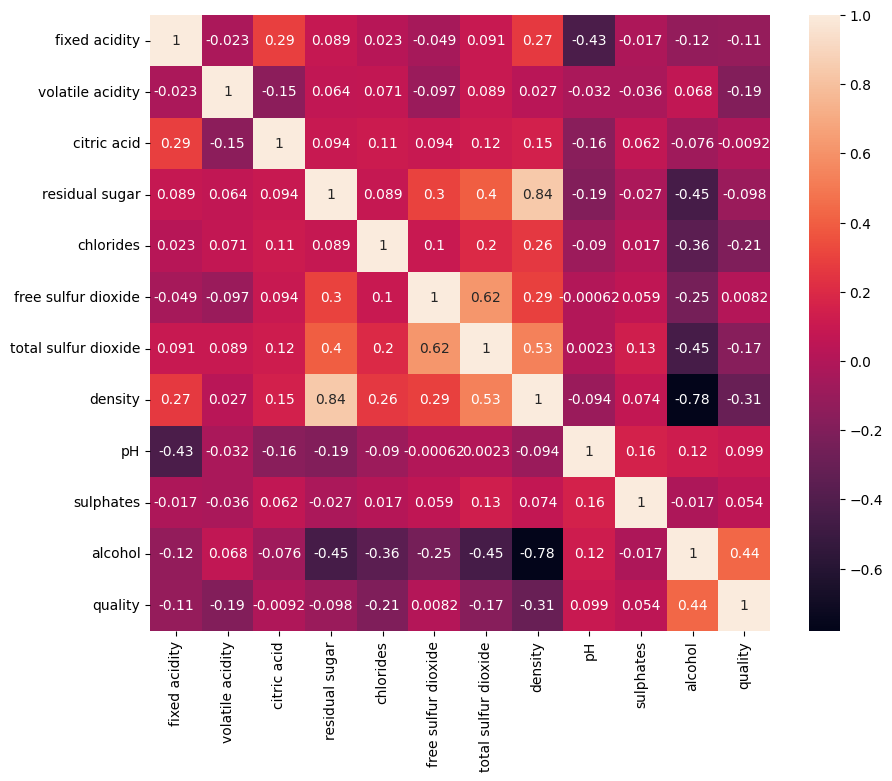

In [5]:
corr = df.corr()
features = corr.index
plt.figure(figsize=(10,8))
ax = sns.heatmap(df[features].corr(),annot=True)

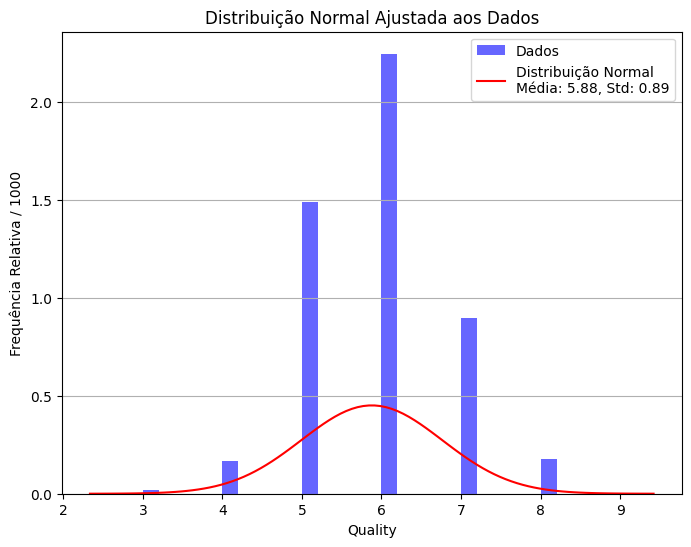

In [6]:
# Dados de exemplo (pode substituir pelo seu DataFrame)
data = df['quality']

# Parâmetros da distribuição normal
mean, std = data.mean(), data.std()

# Geração de pontos para a curva
x = np.linspace(mean - 4*std, mean + 4*std, 100)
y = norm.pdf(x, mean, std)

# Plot do histograma e da curva de densidade
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', label='Dados')
plt.plot(x, y, 'r-', label=f'Distribuição Normal\nMédia: {mean:.2f}, Std: {std:.2f}')
plt.title('Distribuição Normal Ajustada aos Dados')
plt.xlabel('Quality')
plt.ylabel('Frequência Relativa / 1000')
plt.legend()

# Configurando a grade para mostrar apenas linhas horizontais
plt.grid(axis='y')
plt.show()

In [7]:
# Configurando os dados e a coluna alvo
columns = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar", 
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", 
    "pH", "sulphates", "alcohol", "quality"
]
df = df[columns]
target_column = "quality"

In [8]:
# Função para o processo iterativo
def iterative_model_training(data, target_column, n_iterations=1000):
    """
    Realiza treinamento iterativo e avaliação de modelos de regressão.
    
    Parâmetros:
        - data: DataFrame com os dados
        - target_column: Nome da coluna alvo
        - n_iterations: Número de iterações do processo (mínimo: 1000)

    Retorna:
        - Um dicionário com as médias e desvios padrões dos erros para cada modelo
    """
    # Separando as features (X) e a variável alvo (y)
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Listas para armazenar os erros
    errors_lr = []  # Erros para Regressão Linear
    errors_dt = []  # Erros para Decision Tree

    for _ in range(max(n_iterations, 1000)):  # Garantindo ao menos 1000 iterações
        # Particionando os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=None)

        # Instanciando os modelos
        model_lr = LinearRegression()
        model_dt = DecisionTreeRegressor()

        # Treinando os modelos
        model_lr.fit(X_train, y_train)
        model_dt.fit(X_train, y_train)

        # Fazendo predições
        preds_lr = model_lr.predict(X_test)
        preds_dt = model_dt.predict(X_test)

        # Calculando o erro (MAE)
        error_lr = mean_absolute_error(y_test, preds_lr)
        error_dt = mean_absolute_error(y_test, preds_dt)

        # Salvando os erros nas listas
        errors_lr.append(error_lr)
        errors_dt.append(error_dt)

    # Calculando estatísticas
    results = {
        'Linear Regression': {
            'mean_error': np.mean(errors_lr),
            'std_dev_error': np.std(errors_lr)
        },
        'Decision Tree': {
            'mean_error': np.mean(errors_dt),
            'std_dev_error': np.std(errors_dt)
        }
    }
    
    return results

In [9]:
# Executando o processo iterativo
resultados = iterative_model_training(df, target_column='quality', n_iterations=1000)

# Exibindo os resultados
print("Resultados após 1000 iterações:")

# Resultados para Regressão Linear e Árvore de Decisão
print("Regressão Linear - Erro Médio:", resultados['Linear Regression']['mean_error'])
print("Regressão Linear - Desvio Padrão:", resultados['Linear Regression']['std_dev_error'])
print("Árvore de Decisão - Erro Médio:", resultados['Decision Tree']['mean_error'])
print("Árvore de Decisão - Desvio Padrão:", resultados['Decision Tree']['std_dev_error'])

Resultados após 1000 iterações:
Regressão Linear - Erro Médio: 0.5875881335696056
Regressão Linear - Desvio Padrão: 0.004696812362525032
Árvore de Decisão - Erro Médio: 0.6177757363662876
Árvore de Decisão - Desvio Padrão: 0.014287119768924512


In [10]:
def cross_validation_model_training(df, target_column='quality', n_folds=5, n_iterations=1000):
    """
    Realiza validação cruzada k-fold para modelos de regressão com múltiplas iterações.
    
    Parâmetros:
        - df: DataFrame contendo os dados
        - target_column: Nome da coluna alvo (variável dependente)
        - n_folds: Número de divisões (folds) para validação cruzada (padrão: 5)
        - n_iterations: Número de iterações para repetir a validação cruzada (padrão: 1000)
    
    Retorna:
        - Dicionário com os resultados da validação cruzada para cada modelo
    """
    # Separando as features (X) e a variável alvo (y)
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    # Listas para armazenar os erros de cada iteração
    cv_errors_lr = []  # Erros da Regressão Linear
    cv_errors_dt = []  # Erros da Árvore de Decisão
    
    for _ in range(n_iterations):
        # Inicializa o KFold
        kf = KFold(n_splits=n_folds, shuffle=True, random_state=None)
        
        # Listas para armazenar os erros de cada fold
        fold_errors_lr = []
        fold_errors_dt = []
        
        # Realiza a validação cruzada k-fold
        for train_idx, test_idx in kf.split(X):
            # Divide os dados em conjuntos de treino e teste
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            
            # Inicializa os modelos
            model_lr = LinearRegression()
            model_dt = DecisionTreeRegressor()
            
            # Treina os modelos
            model_lr.fit(X_train, y_train)
            model_dt.fit(X_train, y_train)
            
            # Faz previsões
            preds_lr = model_lr.predict(X_test)
            preds_dt = model_dt.predict(X_test)
            
            # Calcula o MAE (Erro Médio Absoluto) para cada modelo
            error_lr = mean_absolute_error(y_test, preds_lr)
            error_dt = mean_absolute_error(y_test, preds_dt)
            
            # Armazena os erros de cada fold
            fold_errors_lr.append(error_lr)
            fold_errors_dt.append(error_dt)
        
        # Calcula o erro médio entre os folds para essa iteração
        cv_errors_lr.append(np.mean(fold_errors_lr))
        cv_errors_dt.append(np.mean(fold_errors_dt))
    
    # Calcula estatísticas finais
    results = {
        'Regressão Linear': {
            'erro_médio_cv': np.mean(cv_errors_lr),
            'desvio_padrão_cv': np.std(cv_errors_lr),
            'erro_mínimo_cv': np.min(cv_errors_lr),
            'erro_máximo_cv': np.max(cv_errors_lr)
        },
        'Árvore de Decisão': {
            'erro_médio_cv': np.mean(cv_errors_dt),
            'desvio_padrão_cv': np.std(cv_errors_dt),
            'erro_mínimo_cv': np.min(cv_errors_dt),
            'erro_máximo_cv': np.max(cv_errors_dt)
        }
    }
    
    return results


In [11]:
# Chamando a função corretamente
results = cross_validation_model_training(df, target_column='quality')

# Exibindo os resultados
print("Resultados após 1000 iterações de validação cruzada:\n")

# Resultados para Regressão Linear
print("Regressão Linear:")
print("  - Erro Médio (MAE):", results['Regressão Linear']['erro_médio_cv'])
print("  - Desvio Padrão do Erro:", results['Regressão Linear']['desvio_padrão_cv'])
print("  - Erro Mínimo (MAE):", results['Regressão Linear']['erro_mínimo_cv'])
print("  - Erro Máximo (MAE):", results['Regressão Linear']['erro_máximo_cv'], "\n")

# Resultados para Árvore de Decisão
print("Árvore de Decisão:")
print("  - Erro Médio (MAE):", results['Árvore de Decisão']['erro_médio_cv'])
print("  - Desvio Padrão do Erro:", results['Árvore de Decisão']['desvio_padrão_cv'])
print("  - Erro Mínimo (MAE):", results['Árvore de Decisão']['erro_mínimo_cv'])
print("  - Erro Máximo (MAE):", results['Árvore de Decisão']['erro_máximo_cv'])

Resultados após 1000 iterações de validação cruzada:

Regressão Linear:
  - Erro Médio (MAE): 0.5857242432513784
  - Desvio Padrão do Erro: 0.0004915933046318494
  - Erro Mínimo (MAE): 0.5844912821750723
  - Erro Máximo (MAE): 0.5876425374355623 

Árvore de Decisão:
  - Erro Médio (MAE): 0.4887089353984699
  - Desvio Padrão do Erro: 0.00873656691453466
  - Erro Mínimo (MAE): 0.46060182193408516
  - Erro Máximo (MAE): 0.514702841299952
